# Lesson 9
### By: Joshua Rackham

In [21]:
from datascience import *
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#### Question 1
The ```tips.csv``` dataset contains data on tips collected from a restaurant.  
**a.** Find the mean tip broken down by sex. On one plot, build a histogram of tips for
males overlaid with a histogram of tips for females. Discuss what you found.
**b.** Repeat part a, but broken down by time.

sex    | count
Female | 87
Male   | 157
sex    | total_bill sum | tip sum | smoker sum | day sum | time sum | size sum
Female | 1570.95        | 246.51  |            |         |          | 214
Male   | 3256.82        | 485.07  |            |         |          | 413
3.0896178343949043
2.833448275862069


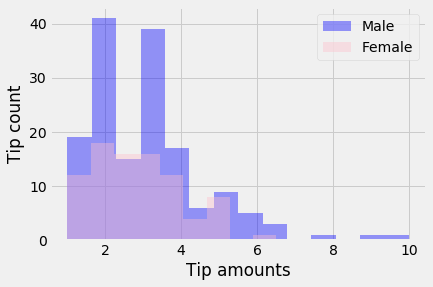

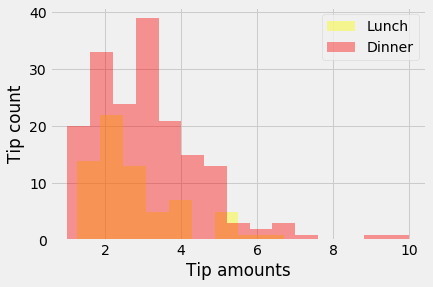

In [22]:
tips = Table.read_table('tips.csv')
print(tips.group('sex'))
print(tips.group('sex', collect=sum))
print(485.07 / 157)
print(246.51 / 87 )

# Build the histogram for by gender
male_tips = tips.where('sex', are.equal_to('Male')).select(1, 2)
female_tips = tips.where('sex', are.equal_to('Female')).select(1, 2)
fig1 = sns.distplot(male_tips['tip'], kde=False, color='blue', label="Male")
fig2 = sns.distplot(female_tips['tip'], kde=False, color='pink', label="Female")
plt.ylabel("Tip count")
plt.xlabel("Tip amounts")
plt.legend()
plt.show()

# Build the histogram for by time
lunch_tips = tips.where('time', are.equal_to('Lunch')).select(1, 5)
dinner_tips = tips.where('time', are.equal_to('Dinner')).select(1, 5)
plt.clf()
fig3 = sns.distplot(lunch_tips['tip'], kde=False, color='yellow', label="Lunch")
fig4 = sns.distplot(dinner_tips['tip'], kde=False, color='red', label="Dinner")
plt.ylabel("Tip count")
plt.xlabel("Tip amounts")
plt.legend()
plt.show()

It looks like the dudes tipped on average \$3.09, while the girls tipped \$2.83 on average. Dudes tipped slightly more, as you can also see in the first figure.
Additionally, even if we disregard the fact that there were more tips at dinner due to more customers at dinner, the largest bin from dinner was at a higher tip amount than the largest tip at lunch, so I would say that on average, tips are larger at dinner. An interesting observation would be to look at tips as a percentage of total bill, and see which meal has a higher tip percentage.

#### Question 2
Create a function called ```weekday_to_num```. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues = 2, … Sun = 7).

In [23]:
def weekday_to_num(day):
    """Takes a weekday abbreviation and returns a number that corresponds with that day of the week, where Monday = 1"""
    if day == 'Mon':
        return 1
    if day == 'Tues':
        return 2
    if day == 'Wed':
        return 3
    if day == 'Thur':
        return 4
    if day == 'Fri':
        return 5
    if day == 'Sat':
        return 6
    if day == 'Sun':
        return 7

#### Question 3
Apply this function to the ```day``` column of ```tips``` and include the result as a new column in
```tips```, called ```weekday_num```.

In [24]:
weekday_numbers = tips.apply(weekday_to_num, 'day')

tips = tips.with_column("weekday_num", weekday_numbers)

#### Question 4
Create a function called ```est_tip```. The goal of this function is to predict tip amount
based on the value of the bill (```total_bill```). To do this, we will look at “nearby” values
(i.e. ```tip```, where the value of ```total_bill``` is near the value of interest.) For example, if
we want to predict the tip for total bill value of \$20, we will simply look at all total bills
near \$20 and average the tip amount. The input of ```est_tip``` should be the total bill
amount and the window, or the difference in total bill we would consider “nearby”. For
example, for a window of \$1, we will look at all bills totaling \$19 thru \$21. The output of
this function will be the predicted tip amount.

In [25]:
def est_tip(total_bill, diff):
    close_to_bill = tips.where('total_bill', are.between(total_bill-diff, total_bill+diff))
    return close_to_bill.column('tip').mean()

#### Question 5
Apply this function to the ```total_bill``` column of ```tips``` and include the result as a new
column in ```tips```. Build a scatterplot showing predicted tip amount overlaid with actual tip
amount.

In [26]:
window = 1

tips = tips.with_column("Predicted Tip", tips.apply(lambda x: est_tip(x, window), "total_bill"))

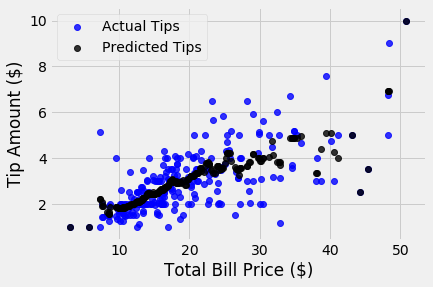

In [27]:
plt.clf()
fig5 = sns.regplot(tips.column('total_bill'), tips.column('tip'), fit_reg=False, color='blue', label="Actual Tips")
fig6 = sns.regplot(tips.column('total_bill'), tips.column('Predicted Tip'), fit_reg=False, color='black', label="Predicted Tips")
plt.xlabel("Total Bill Price ($)")
plt.ylabel("Tip Amount ($)")
plt.legend()
plt.show()

In [28]:
from ipywidgets import interact

In [29]:
def est(window=1):
    my_tips = tips.with_column("Predicted Tip", tips.apply(lambda x: est_tip(x, window), "total_bill"))
    my_tips.scatter("total_bill", ["tip", "Predicted Tip"])
    
interact(est, window=(.1, 50.1, .1))

A Jupyter Widget

<function __main__.est>